In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats, integrate, optimize
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

In [33]:
#tat[["asord", "atechid", "atdate"]].groupby(["atdate", "atechid"]).count().unstack().fillna(0)

In [238]:
#Yearly data
tat=pd.read_excel("TAT_2015_2016.xlsx")
tat.columns = tat.columns.str.strip()
date_columns = ["ascdate", "aodate", "l0date", "atdate"]
for i in date_columns:
    tat[i] = pd.to_datetime(tat[i])
tat = tat[~tat.atechid.isin(tat.atechid.value_counts()[tat.atechid.value_counts() < 100].index.values)].reset_index(drop=True)
tat = tat.sort_values(by=["atdate", "ascdate"], ascending=[True, True]).reset_index(drop=True).drop_duplicates("asord").reset_index(drop=True)
tat["tat"] = (tat["atdate"] - tat["aodate"]).apply(lambda x: x / np.timedelta64(1,'D')).astype(int)
tat["technum"]=0
for i in tat.atdate.unique():
    tat.loc[tat.atdate == i, "technum"] = tat[tat.atdate == i].atechid.unique().size

In [3]:
#Monthly data
tat = pd.read_excel("TAT062716.xls")
tat = tat.drop_duplicates("asord")
tat.columns = tat.columns.str.strip()
tat = tat[~tat.atechid.isin(tat.atechid.value_counts()[tat.atechid.value_counts() < 10].index.values)].reset_index(drop=True)
date_columns = ["ascdate", "aodate", "l0date", "atdate"]
for i in date_columns:
    tat[i] = pd.to_datetime(tat[i])
tat["tat"] = (tat["atdate"] - tat["aodate"]).apply(lambda x: x / np.timedelta64(1,'D')).astype(int)
tat["technum"]=0
for i in tat.atdate.unique():
    tat.loc[tat.atdate == i, "technum"] = tat[tat.atdate == i].atechid.unique().size


In [210]:
#tat[["asord", "atechid", "aresult", "aodate", "atdate"]].groupby(["atdate", "atechid", "aresult"]).count().unstack()["asord"]["."]/(tat[["asord", "atechid", "aresult", "aodate", "atdate"]].groupby(["atdate", "atechid", "aresult"]).count().unstack()["asord"]["."] + tat[["asord", "atechid", "aresult", "aodate", "atdate"]].groupby(["atdate", "atechid", "aresult"]).count().unstack()["asord"]["NONE"])*100

In [211]:
#tat[["asord", "aresult", "aodate", "atdate"]].groupby(["atdate", "aresult"]).count().unstack()["asord"]["."]/(tat[["asord", "aresult", "aodate", "atdate"]].groupby(["atdate", "aresult"]).count().unstack()["asord"]["."]+tat[["asord", "aresult", "aodate", "atdate"]].groupby(["atdate", "aresult"]).count().unstack()["asord"]["NONE"])*100

In [4]:
tatgraph = tat[["asord", "atdate", "tat", "technum"]].groupby("atdate").mean().sort_index(ascending=False)

In [5]:
weekday = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
tatgraph["weekday"] = [weekday[i] for i in tatgraph.index.weekday]

In [7]:
colors = []
for i in tatgraph.tat.values.round():
    if i <= 7:
        colors.append("#feedde")
    elif i <=8:
        colors.append("#fdbe85")
    elif i <=9:
        colors.append("#fd8d3c")
    elif i <=10:
        colors.append("#e6550d")
    else:
        colors.append("#a63603")

textcolors=[]
for i, d in enumerate(tatgraph.tat.values):
    textcolors.append("black" if tatgraph.tat.values[i].round() <= 8 else "white")        

In [319]:
colors = []
for i in tatgraph.tat.values.round():
    if i <= tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(1/8)):
        colors.append("#fee8c8")
    elif i <=tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(2/8)):
        colors.append("#fdd49e")
    elif i <=tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(3/8)):
        colors.append("#fdbb84")
    elif i <=tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(4/8)):
        colors.append("#fc8d59")
    elif i <=tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(5/8)):
        colors.append("#ef6548")
    elif i <=tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(6/8)):
        colors.append("#d7301f")
    elif i <=tatgraph.tat.min() + ((tatgraph.tat.max() - tatgraph.tat.min())*(7/8)):
        colors.append("#b30000")    
    else:
        colors.append("#7f0000")
        
textcolors=[]
for i, d in enumerate(tatgraph.tat.values):
    textcolors.append("black" if tatgraph.tat.values[i].round() <= 8 else "white")

In [ ]:
import calendar

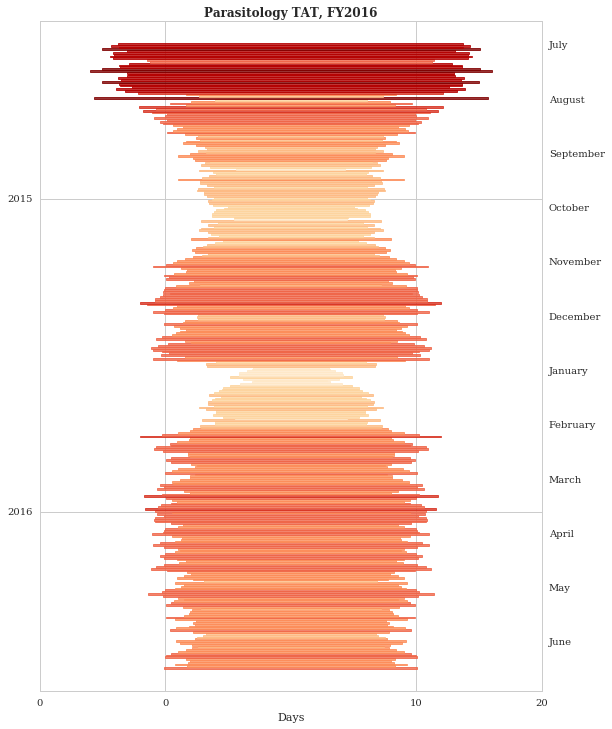

In [490]:
sns.set_style("whitegrid")
x = range(len(tatgraph))
positive_data = tatgraph.tat.values
fig = plt.figure(figsize=[9,12])
ax = plt.subplot(111)
ax.barh(x, positive_data, color=colors,lw=1, edgecolor=colors, left=[-5+(5-(i/2)) for i in positive_data], alpha=0.8, height=1)
ax.set_xlim([-10,10])
ax.set_ylim([-12, 358])
ax.set_yticks([87, 260])
#plt.yticks(x, tatgraph.index.astype(str), rotation='horizontal', family="serif")
ax.set_yticklabels([2016, 2015], family="serif")
for label in ax.yaxis.get_ticklabels():
    label.set_verticalalignment('center')
ax.yaxis.grid(True)
ax.set_xticks([-10,-5, 5,10])
#ax.set_xticks(np.arange(-5,6))
ax.set_xticklabels([0, 0, 10, 20], family="serif")
#ax.set_xticklabels([0,"","","","","","","","","",10])
#ax.xaxis.grid(False)
#ax.axvline(0, lw=1, color = "black")
ax2 = plt.twinx()
ax2.set_xlim([-10,10])
ax2.set_ylim([-12,358])
ax2.yaxis.grid(False)
ax2.set_yticks([((i*30)+15) for i in np.arange(12)])
for label in ax2.yaxis.get_ticklabels():
    label.set_verticalalignment('center')
ax2.set_yticklabels([calendar.month_name[tatgraph.index.month[i]] for i in [((i*30)+12) for i in np.arange(12)]], rotation='horizontal', family="serif")
#ax2.set_yticks([i+0.5 for i in range(len(tatgraph))])
plt.title("Parasitology TAT, FY2016", family="serif", weight="bold")
ax.set_xlabel("Days", family="serif")
#for i in range(len(tatgraph)):
    #ax.text(0, i+0.06, "{0:.1f}".format(tatgraph.tat.values[i].round(decimals=1)), verticalalignment='bottom', horizontalalignment='center', weight="bold", color=textcolors[i], family="serif")
plt.savefig("TAT_FY2016.pdf", bbox_inches="tight")

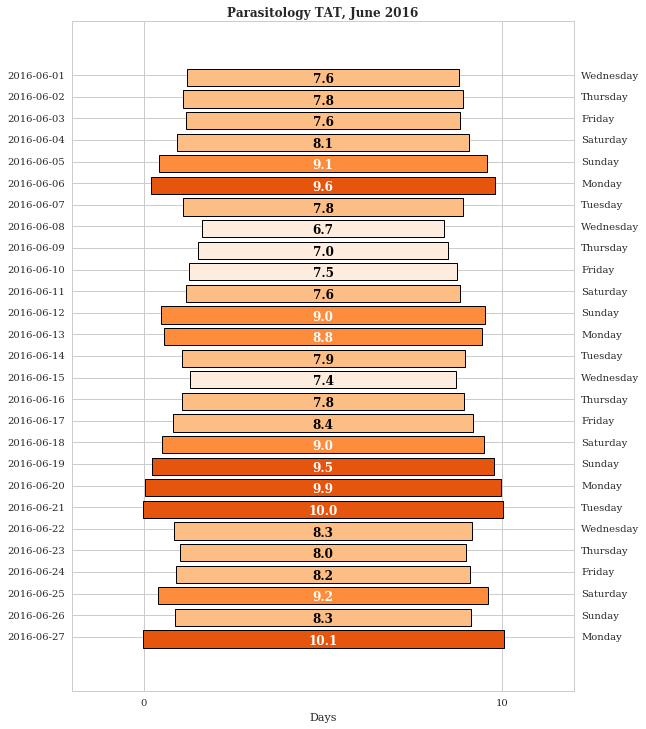

In [29]:
sns.set_style("whitegrid")
x = range(len(tatgraph))
positive_data = tatgraph.tat.values

fig = plt.figure(figsize=[9,12])

ax = plt.subplot(111)
ax.barh(x, positive_data, color=colors,lw=1, edgecolor="black", left=[-5+(5-(i/2)) for i in positive_data])
ax.set_xlim([-7,7])
ax.set_ylim([-2,29])
plt.yticks(x, tatgraph.index.astype(str), rotation='horizontal', family="serif")
for label in ax.yaxis.get_ticklabels():
    label.set_verticalalignment('center')
ax.set_yticks([i+0.5 for i in range(len(tatgraph))])
ax.set_xticks([-5,5])
#ax.set_xticks(np.arange(-5,6))
ax.set_xticklabels([0,10], family="serif")
#ax.set_xticklabels([0,"","","","","","","","","",10])
#ax.xaxis.grid(False)
#ax.axvline(0, lw=1, color = "black")
ax2 = plt.twinx()
ax2.set_xlim([-7,7])
ax2.set_ylim([-2,29])
ax2.yaxis.grid(False)
ax2.set_yticks([i+0.5 for i in range(len(tatgraph))])
for label in ax2.yaxis.get_ticklabels():
    label.set_verticalalignment('center')
ax2.set_yticklabels(tatgraph.weekday, rotation='horizontal', family="serif")
#ax2.set_yticks([i+0.5 for i in range(len(tatgraph))])
plt.title("Parasitology TAT, June 2016", family="serif", weight="bold")
ax.set_xlabel("Days", family="serif")

for i in np.arange(len(tatgraph)):
    ax.text(0, i+0.35, tatgraph.tat.values[i].round(1), verticalalignment='center', horizontalalignment='center', weight="bold", color=textcolors[i], family="serif")
plt.savefig("TAT_JUNE_27_2016.png", bbox_inches="tight", dpi=1000)

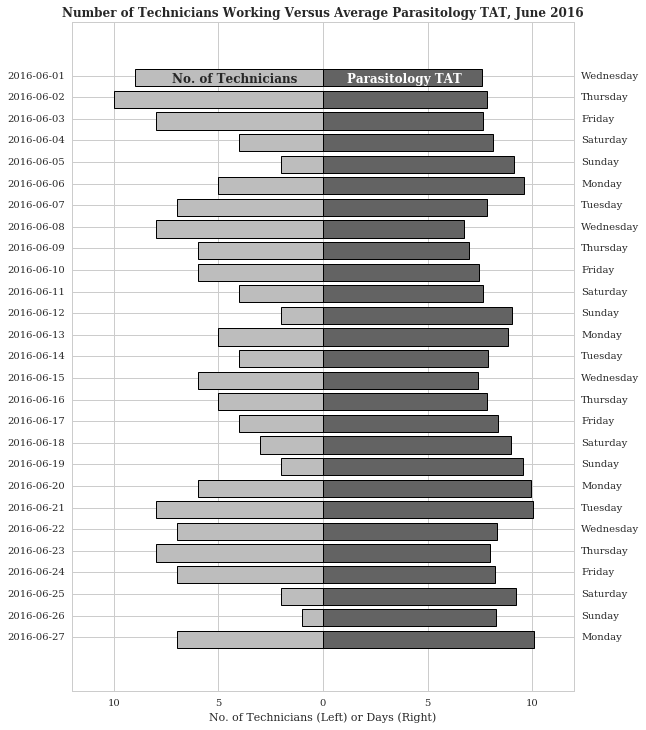

In [148]:
sns.set_style("whitegrid")
x = range(len(tatgraph))
negative_data = -tatgraph.technum.values
positive_data = tatgraph.tat.values

fig = plt.figure(figsize=[9,12])

ax = plt.subplot(111)
ax.barh(x, negative_data, color='#bdbdbd',lw=1, edgecolor="black", label="No. of Technicians")
ax.barh(x, positive_data, color='#636363',lw=1, edgecolor="black", label="Parasitology TAT")
ax.set_xlim([-12,12])
ax.set_ylim([-2,29])
ax.set_xticklabels(["", 10,5,0,5,10], family="serif")
plt.yticks(x, tatgraph.index.astype(str), rotation='horizontal', family="serif")
for label in ax.yaxis.get_ticklabels():
    label.set_verticalalignment('center')
ax.set_yticks([i+0.5 for i in range(len(tatgraph))])

#ax.set_xticklabels([10,5,0,5,10])
#ax.yaxis.grid(False)
plt.title("Number of Technicians Working Versus Average Parasitology TAT, June 2016", family="serif", weight="bold")
ax.set_xlabel("No. of Technicians (Left) or Days (Right)", family="serif")
#ax.legend(loc='upper center', fontsize=12)
ax.text(-1.25, 26.37, 'No. of Technicians', verticalalignment='center', horizontalalignment='right', weight="bold", family="serif")
ax.text(1.15, 26.37, 'Parasitology TAT', verticalalignment='center', horizontalalignment='left', weight="bold", color="white", family="serif")
ax2 = plt.twinx()
ax2.set_xlim([-12,12])
ax2.set_ylim([-2,29])
ax2.yaxis.grid(False)
ax2.set_yticks([i+0.5 for i in range(len(tatgraph))])
for label in ax2.yaxis.get_ticklabels():
    label.set_verticalalignment('center')
ax2.set_yticklabels(tatgraph.weekday, rotation='horizontal', family="serif")
plt.savefig("TAT_Tech_June_27_2016.pdf", bbox_inches="tight")